In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [ ]:
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf'
!wget 'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'

--2025-12-08 03:23:12--  https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf [following]
--2025-12-08 03:23:12--  https://raw.githubusercontent.com/openmaptiles/fonts/master/roboto/Roboto-Light.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162420 (159K) [application/octet-stream]
Saving to: ‘Roboto-Light.ttf’

Roboto-Light.ttf    100%[===================>] 158.61K  --.-KB/s    in 0.02s   

2025-12-08 03:23:13 (7.55 MB/s) - ‘Roboto-Light.ttf’ saved [162420/162420]

--2025-1

In [ ]:
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)

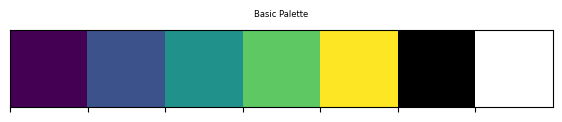

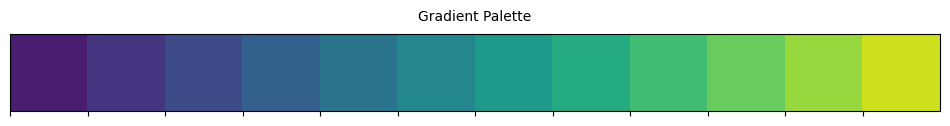

In [ ]:

colors = ["#440154", "#3b528b", "#21918c", "#5ec962", "#fde725", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('viridis',  12)
colors_heat1 = sns.color_palette('viridis', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

In [ ]:
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DDAll.csv to DDAll.csv


In [ ]:
df = uploaded
path = "/content/DDAll.csv"
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [ ]:
keep = ['Date', 'Cases']
new_f = df[keep]
new_f.to_csv("DC.csv", index=False)

path = "/content/DC.csv"
df = pd.read_csv(path, index_col='Date', parse_dates=True)

df.index.freq='MS'

In [ ]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
# @title Checking Stationary

def ad_test(df):
  dftest = adfuller(df, autolag = 'AIC')
  print("1. ADF: ", dftest[0])
  print("2. P-Value: ", dftest[1])
  print("3. Num of Lags: ", dftest[2])
  print("4. Num Observations for ADF Regression and Crit Vals Calc: ", dftest[3])
  print("5. Critical Values: ")
  for key, val in dftest[4].items():
    print("\t", key, ":", val)

ad_test(df['Cases'])

1. ADF:  -3.452267328133417
2. P-Value:  0.00930100511929851
3. Num of Lags:  1
4. Num Observations for ADF Regression and Crit Vals Calc:  55
5. Critical Values: 
	 1% : -3.5552728880540942
	 5% : -2.9157312396694217
	 10% : -2.5956695041322315


In [ ]:
stepwise_fit = auto_arima(df['Cases'], trace = True,
                          seasonal = True,
                          suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1174.216, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1182.963, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1179.254, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1175.654, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1181.006, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1172.509, Time=1.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1177.145, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1176.957, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1178.866, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1172.414, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1175.161, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1174.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -582.207
Date:                Mon, 08 Dec 2025   AIC                           1172.414
Time:                        03:56:14   BIC                           1180.516
Sample:                    01-01-2021   HQIC                          1175.555
                         - 09-01-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6518      0.201      3.238      0.001       0.257       1.046
ma.L1         -0.3244      0.219     -1.481      0.139      -0.754       0.105
ma.L2         -0.5648      0.127     -4.464      0.000      -0.813      -0.317
sigma2      7.492e+07   2.16e-09   3.47e+16      0.000    7.49e+07    7.49e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.29
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.4e+32. Standard errors may be unstable.
"""

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Cases'],
                order = (1, 1, 2),
                seasonal_order =(1, 1, 2, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Cases   No. Observations:                   45
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -334.937
Date:                            Mon, 08 Dec 2025   AIC                            683.874
Time:                                    04:13:39   BIC                            694.134
Sample:                                01-01-2021   HQIC                           687.275
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4793      0.495      0.969      0.333      -0.490       1.449
ma.L1         -0.0975      0.901     -0.108      0.914      -1.864       1.669
ma.L2         -0.8169      0.333     -2.455      0.014      -1.469      -0.165
ar.S.L12      -0.4594      4.685     -0.098      0.922      -9.642       8.723
ma.S.L12      -0.2290      4.688     -0.049      0.961      -9.418       8.960
ma.S.L24       0.0752      2.923      0.026      0.979      -5.653       5.804
sigma2      1.079e+08    8.8e-08   1.23e+15      0.000    1.08e+08    1.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.67
Prob(Q):                              0.81   Prob(JB):                         0.06
Heteroskedasticity (H):               2.36   Skew:                             0.45
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.97e+31. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

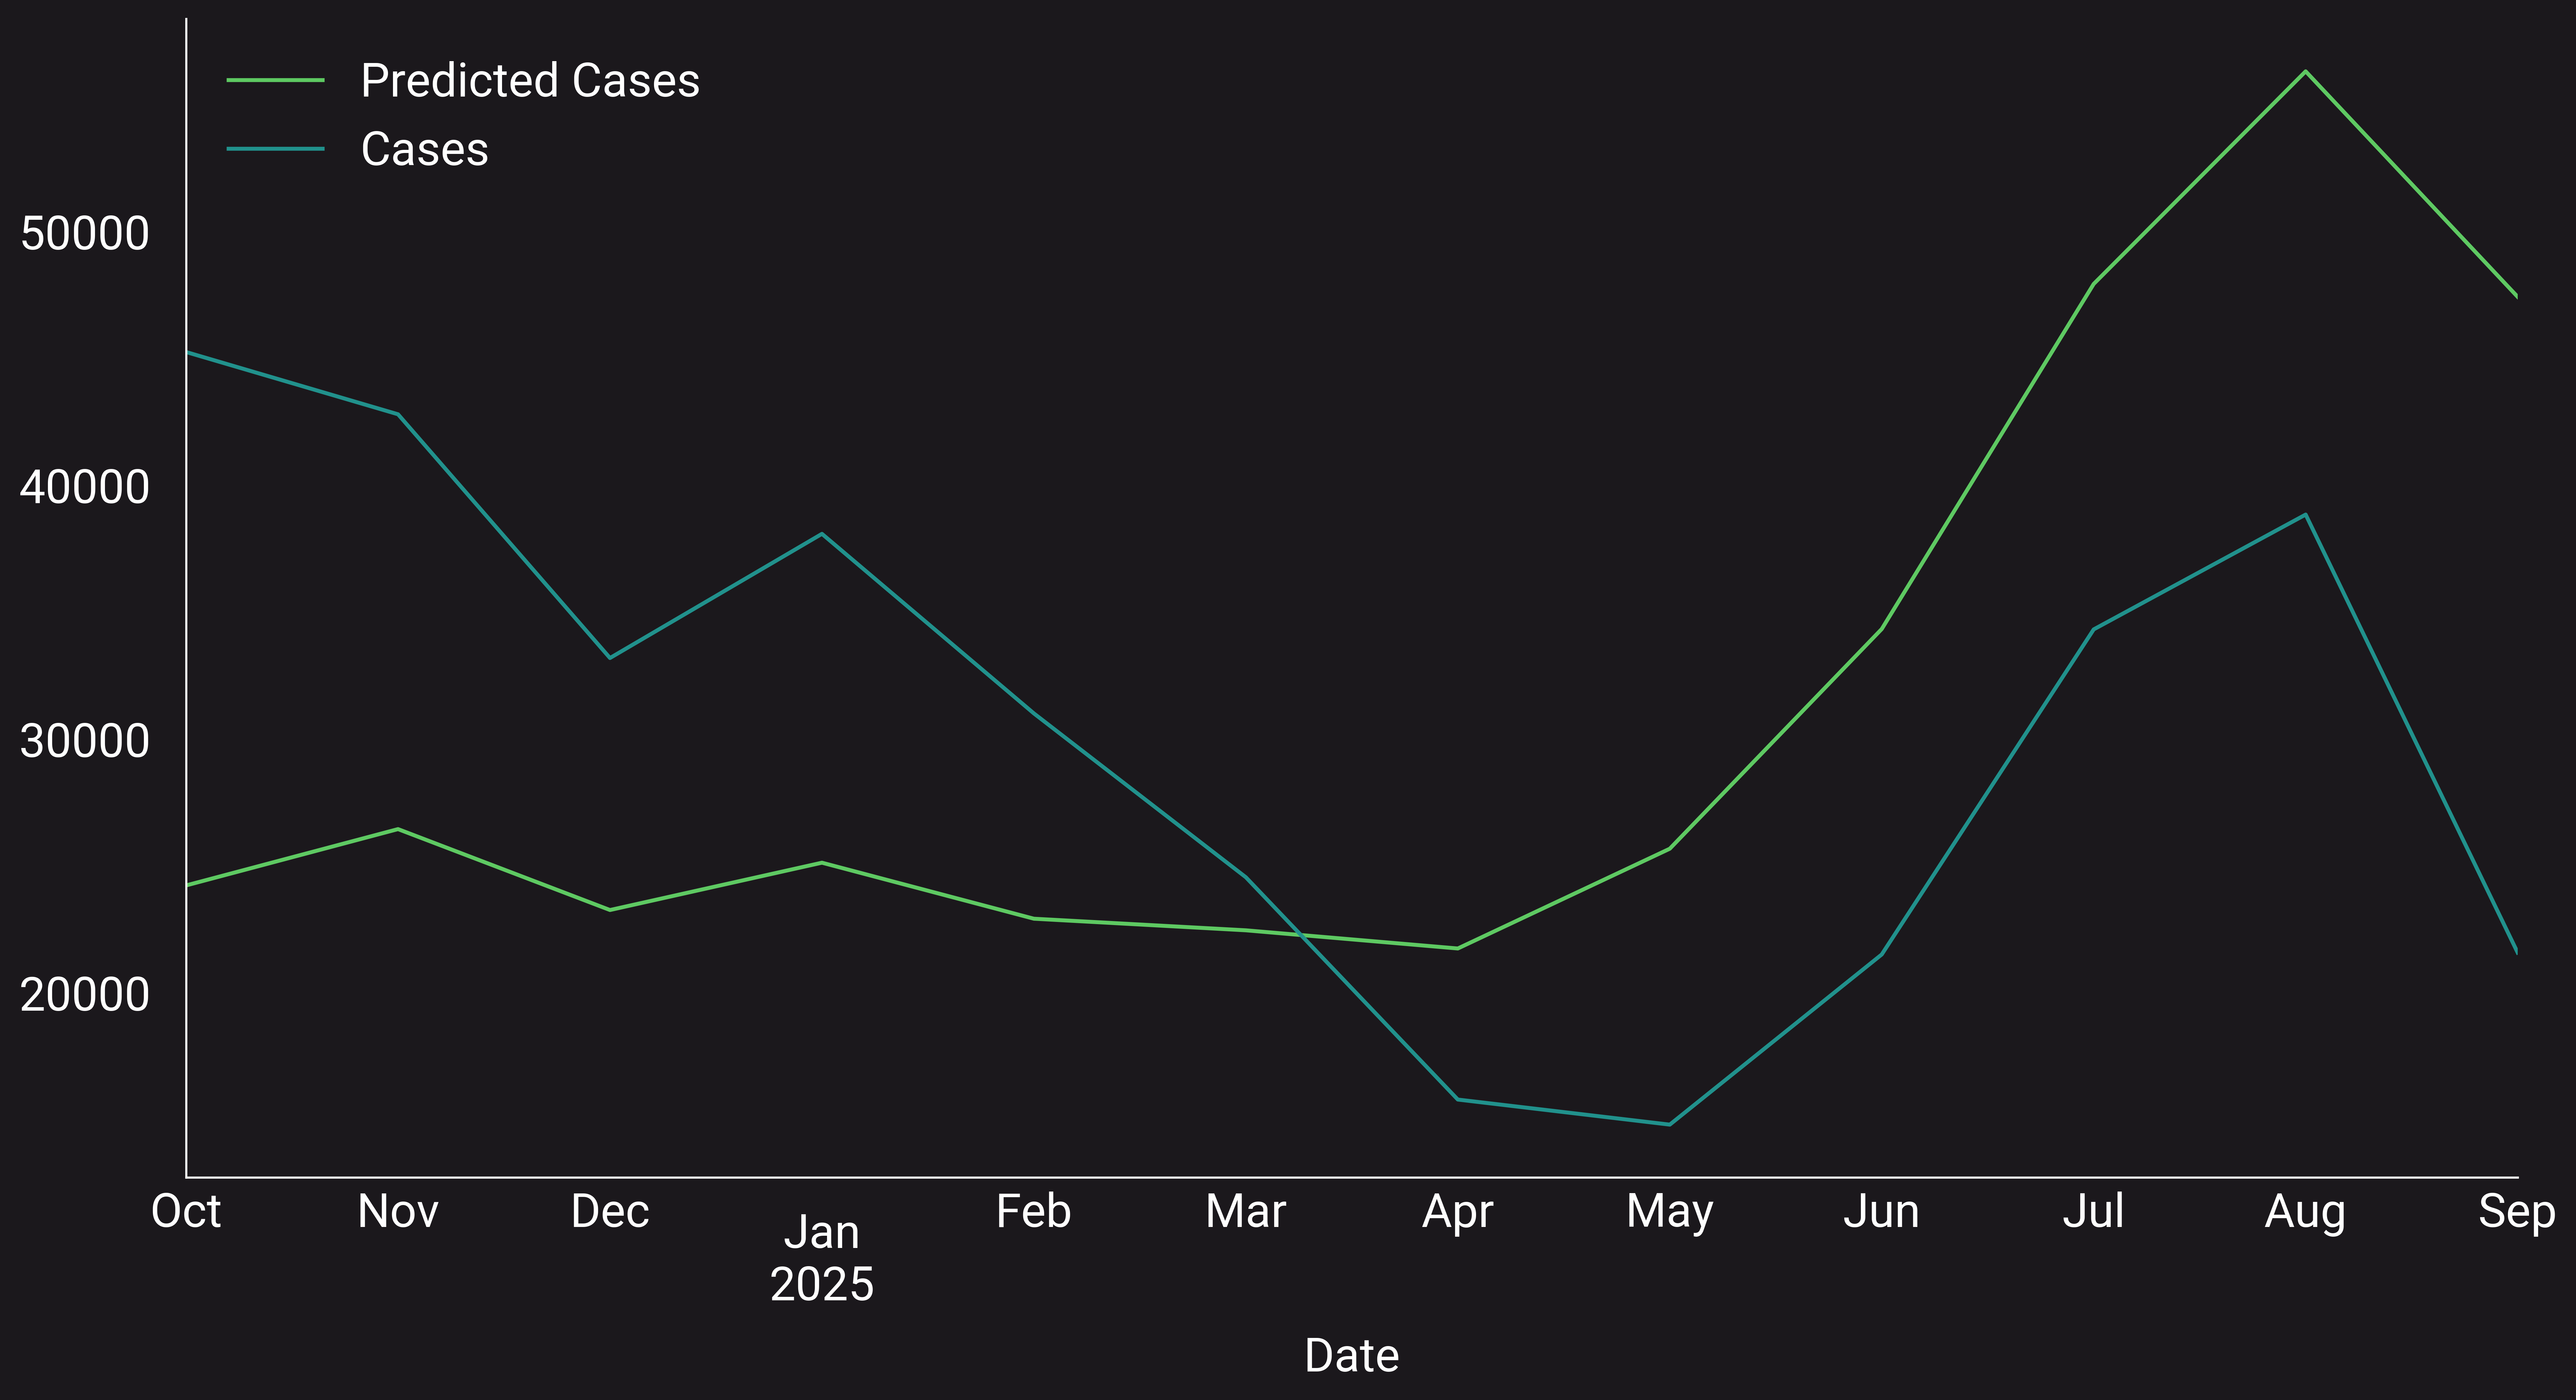

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predicted Cases")

# plot predictions and actual values
predictions.plot(legend = True, color = colors[3])
test['Cases'].plot(legend = True, color = colors[2])

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test["Cases"], predictions))

#Calculate mean of dataset
print(test['Cases'].mean())

14498.262523439016
30149.75


<Axes: xlabel='Date'>

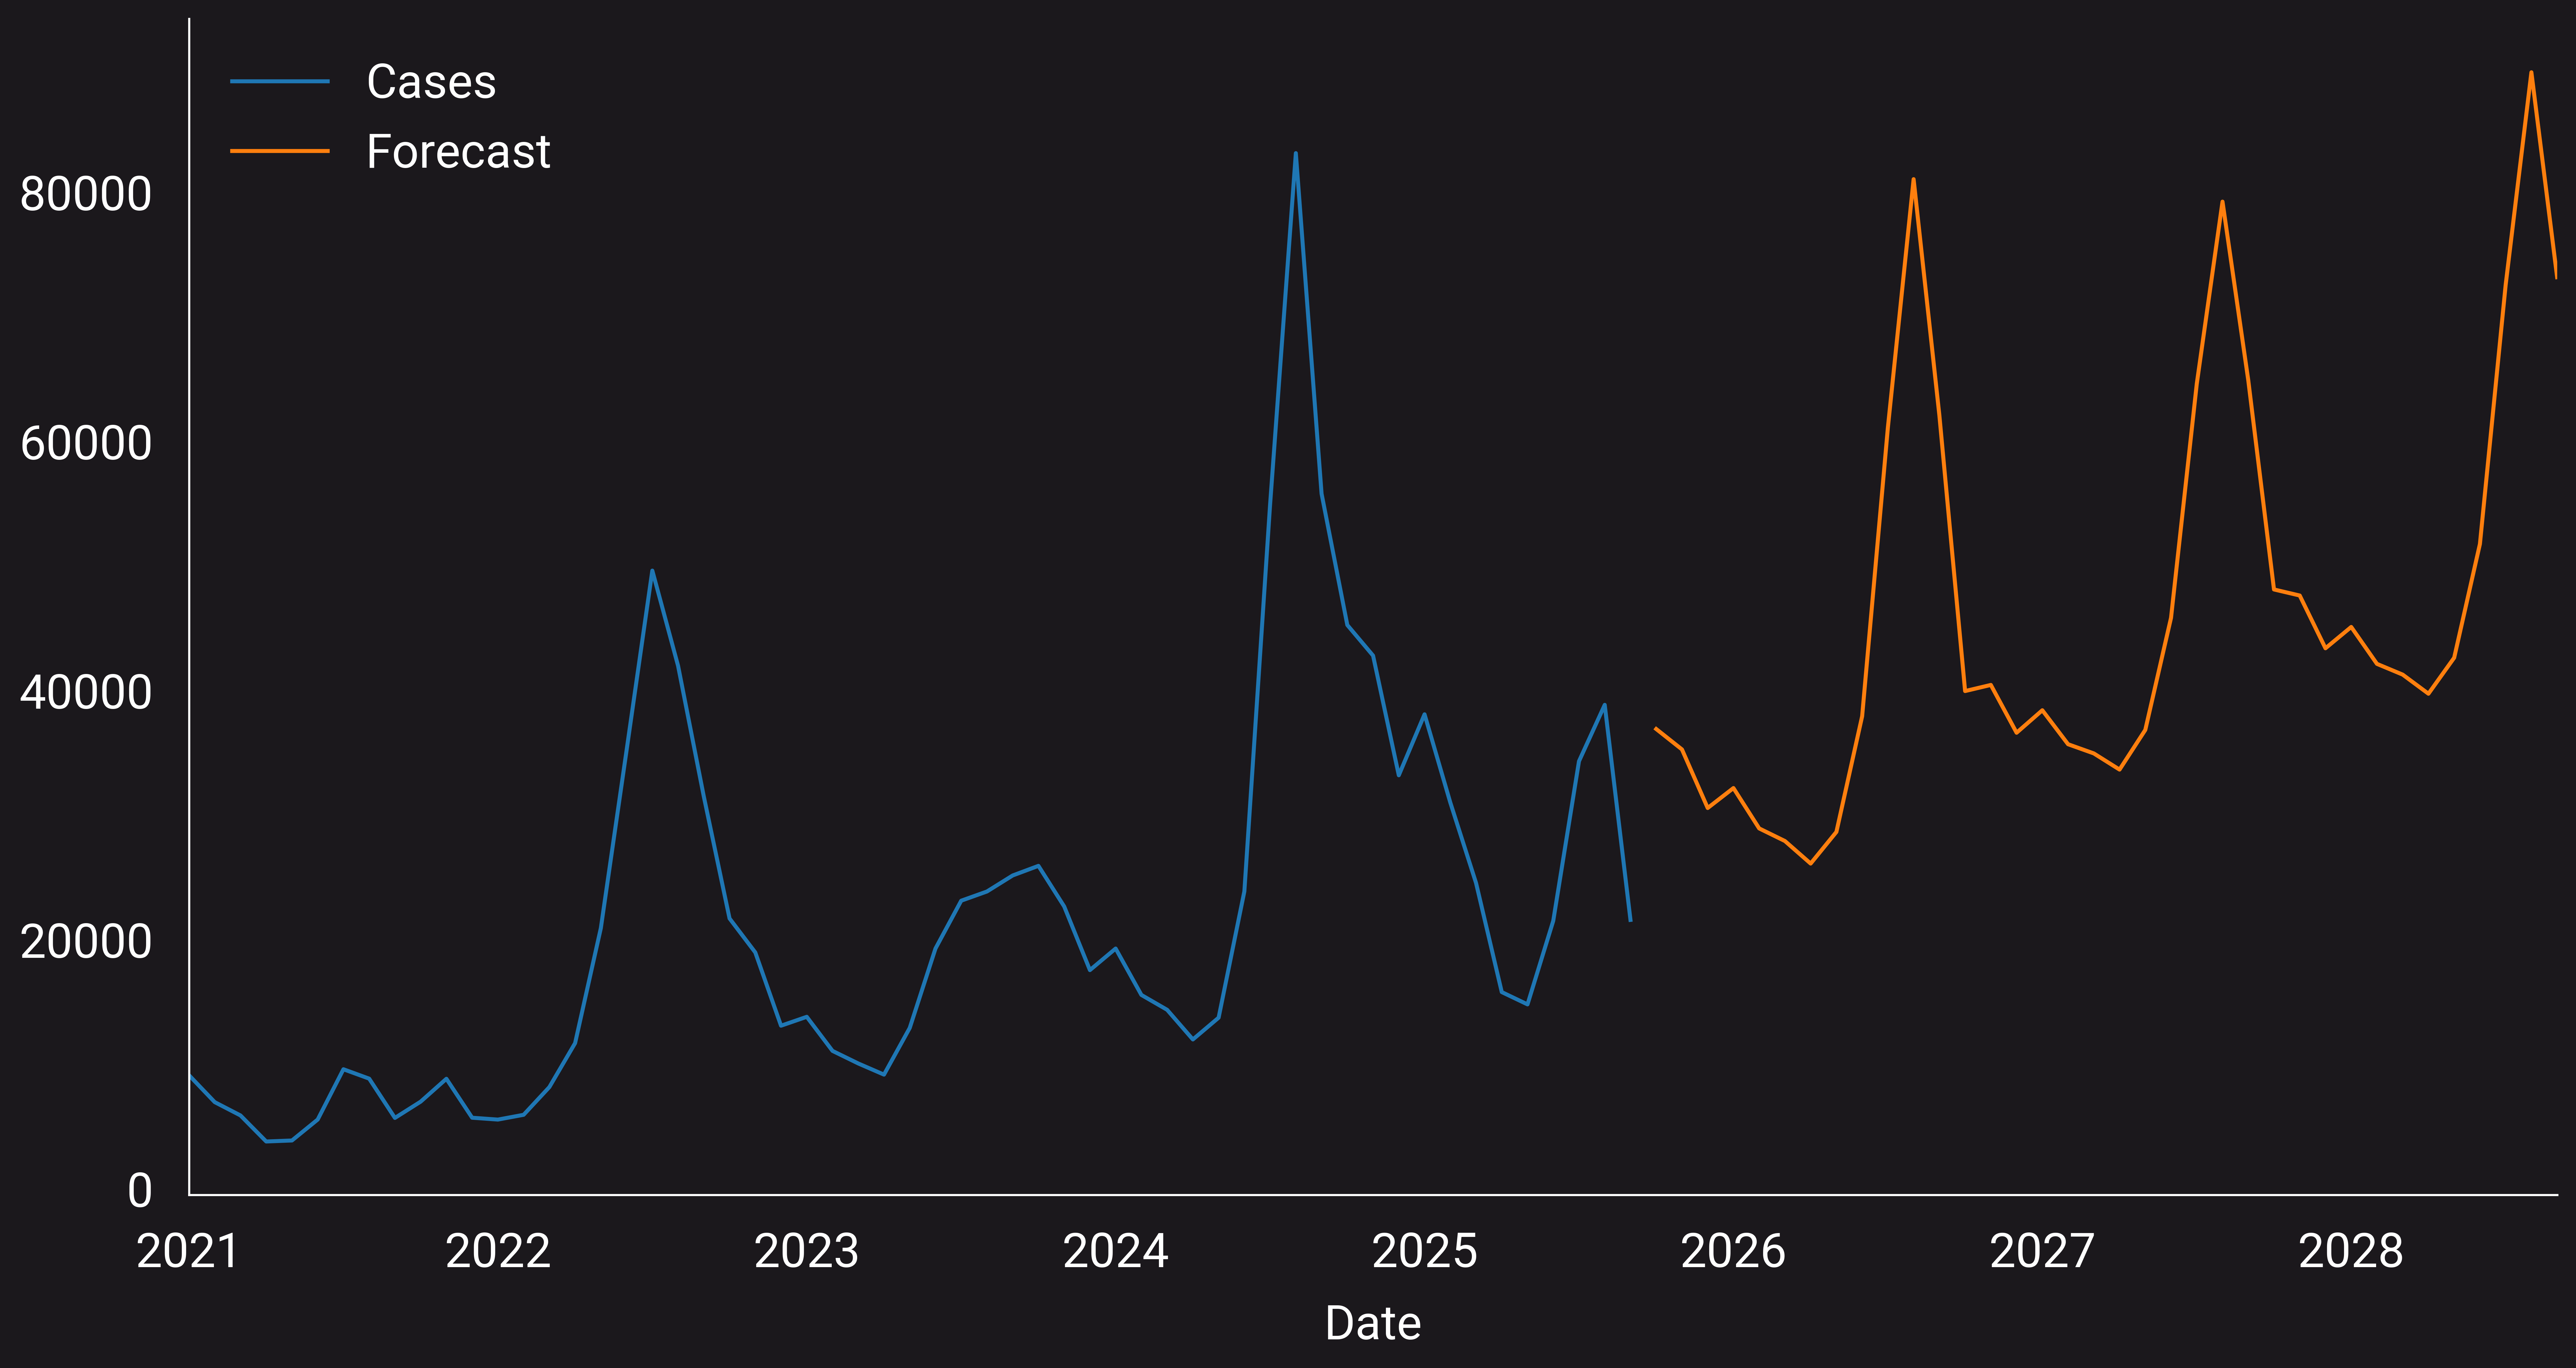

In [ ]:
# Forecast for the next 3 years
forecast = result.predict(start = len(df),
                          end = (len(df)-1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

df['Cases'].plot(legend = True)
forecast.plot(legend = True)